In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
#df = pd.DataFrame(iris.data, columns=iris.feature_names)
#df = pd.read_csv("https://raw.githubusercontent.com/NeilPandey/Test_Dataset/master/iris.csv")

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
df.shape

(150, 4)

In [7]:
df['target'] = iris.target

In [8]:
df[df.target==0].head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [10]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [11]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [12]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [13]:
df0 = df[0:50]
df1 = df[50:100]
df2 = df[100:]

In [14]:
df1.shape

(50, 6)

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

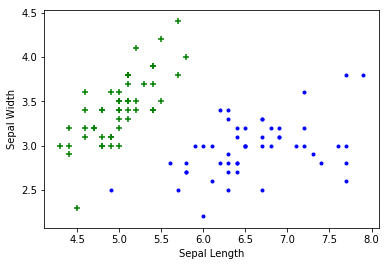

In [32]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],
            color="green",marker='+')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],
            color="blue",marker='.')
#plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],
            #color="red",marker='*')

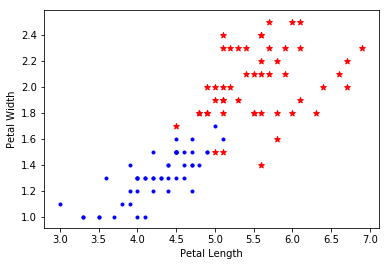

In [30]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
#plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],
            #color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],
            color="blue",marker='.')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],
           color="red",marker='*')

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#Data Prepn
X = df.drop(['target','flower_name'], axis=1)
y = df.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                   random_state=0)

In [21]:
from sklearn.svm import SVC
model = SVC()

In [22]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
model.score(X_test, y_test)

0.9777777777777777

In [24]:
X_test[0:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0


In [25]:
model.predict([[6.3,2.9,5.6,1.8]])

array([2])

In [26]:
model_C = SVC(C=10,gamma=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9777777777777777

In [27]:
model_g = SVC(gamma=2)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9777777777777777

In [28]:
model_linear_kernal = SVC(kernel='rbf')
model_linear_kernal.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
model_linear_kernal.score(X_test, y_test)

0.9777777777777777